In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## PART 1: Load And Prepare Data

In [84]:
#Loading the data 
df = pd.read_csv('data/Salary_Data.csv.xls')
print("Dataset shape:", df.shape)

print("\nFirst few rows")
print(df.head())

Dataset shape: (30, 2)

First few rows
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


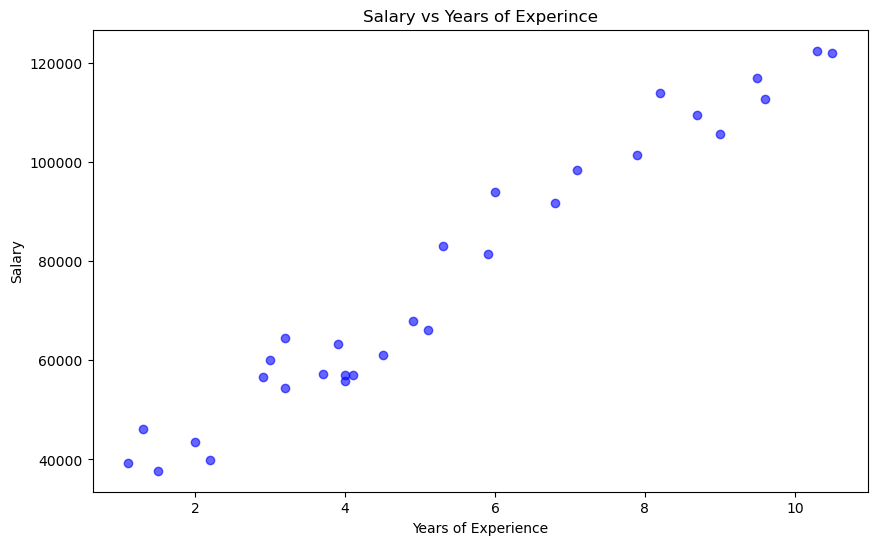

In [88]:
#Visualize the data
plt.figure(figsize = (10,6))
plt.scatter(df["YearsExperience"], df["Salary"], color="blue", alpha = 0.6)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experince")
plt.show()

## PART 2: Prepare X and y Correctly

In [94]:
#Define the features (Independed and Dependent Variables)

#This X would give you a DataFrame (2D) 
#Most ML Libraries expect 2D input for features 

#Series mean a vector[:,0]
#DataFrame means a Matrix[:,[0]]

#X should be all rows, first column(YearsExperience)
X = df.iloc[:,0].values  # .values converts to numpy array

#y should be all rows, last column(Salary)
y = df.iloc[:,-1].values   #.values converts to numpy array

In [96]:
print("\n ----UNDERSTANDING SHAPES ----")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


 ----UNDERSTANDING SHAPES ----
X shape: (30,)
y shape: (30,)


In [100]:
#For linear regression, we often want X to be 2D (samples,features)
#Even though we have 1 feature, sklearn expects (n_samples, n_features)

X = X.reshape(-1,1)  # -1 means "figure it out", 1 mean 1 column
print(f"X shape after reshape: {X.shape}") #(30,1) --> 2D array

X shape after reshape: (30, 1)


## PART 3: Train-Test Split

In [103]:
#Splitting the dataset into train-set and test-set
#30% goes to testing data-set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state =2)


print("\n ---- Train-Test Split ----")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


 ---- Train-Test Split ----
X_train shape: (24, 1)
y_train shape: (24,)
X_test shape: (6, 1)
y_test shape: (6,)


In [23]:
#Training the model 

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
#Train model on the Training set

model.fit(X_train, y_train)

#This outputs an ndarray[] so we are taking the first index which is a float and then round it
print(f"The slope is, {model.coef_[0]:.2f}")

#This outputs a single output which is a scalar, no need of indexing
print(f"The intercept is, {model.intercept_:.2f}")


#Predicted values
print(model.predict(X_train), end=" ")


The slope is, 9569.59
The intercept is, 24393.17
[102863.7816125   53101.92980825  43532.34292281  89466.35997289
  52144.9711197  116261.2032521   62671.51669368  45446.2602999
  61714.55800514  73198.06226766 122959.91407191 110519.45112084
  75111.97964474  38747.5494801   55015.84718533 115304.24456356
 107648.57505521  80853.731776    62671.51669368  99992.90554687
 124873.83144899  63628.47538222  71284.14489057  55015.84718533] 

In [27]:
#Check X_train or y_train contains NaN values

np.isnan(X_train).any()
np.isnan(y_train).any()

False

In [29]:
#Length of both training set (to check if we are taking the mean of an EMPTY array)

len(X_train)
len(y_train)

24

In [31]:


X_train.shape

(24, 1)

In [33]:
y_train.shape


(24,)

Text(0, 0.5, 'Salaries')

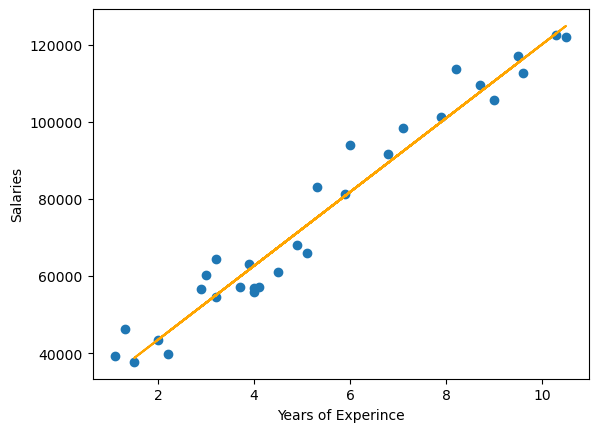

In [35]:
#Plot all the points

plt.scatter(df["YearsExperience"], df["Salary"])
plt.plot(X_train, model.predict(X_train), color="orange")
plt.xlabel("Years of Experince")
plt.ylabel("Salaries")

## Applying Gradient Descent Here:

### Initializing Parameters : Start with random initial values for the slope(m) and Intercept(b)


In [78]:
""" In here we are initializing m = 0,  b = 0 """

#y = mX + b
m =  9569.59
b = 0
y_pred = (m * X_train) + 0


### Calculate the Cost Function: Measure the error using the Mean Squared Error (MSE):

In [58]:
cost = 0

for i in range(len(X_train)):
    y_pred = m * X_train.iloc[i] +b
    print(y_pred)
    cost += (y_pred - y_train.iloc[i])**2

cost = cost/len(X_train)
    
print(cost)

YearsExperience    78470.638
Name: 23, dtype: float64
YearsExperience    28708.77
Name: 6, dtype: float64
YearsExperience    19139.18
Name: 3, dtype: float64
YearsExperience    65073.212
Name: 20, dtype: float64
YearsExperience    27751.811
Name: 5, dtype: float64
YearsExperience    91868.064
Name: 27, dtype: float64
YearsExperience    38278.36
Name: 12, dtype: float64
YearsExperience    21053.098
Name: 4, dtype: float64
YearsExperience    37321.401
Name: 10, dtype: float64
YearsExperience    48804.909
Name: 16, dtype: float64
YearsExperience    98566.777
Name: 28, dtype: float64
YearsExperience    86126.31
Name: 25, dtype: float64
YearsExperience    50718.827
Name: 17, dtype: float64
YearsExperience    14354.385
Name: 2, dtype: float64
YearsExperience    30622.688
Name: 7, dtype: float64
YearsExperience    90911.105
Name: 26, dtype: float64
YearsExperience    83255.433
Name: 24, dtype: float64
YearsExperience    56460.581
Name: 18, dtype: float64
YearsExperience    38278.36
Name: 11, 

ValueError: x and y must have same first dimension, but have shapes (24, 1) and (1,)

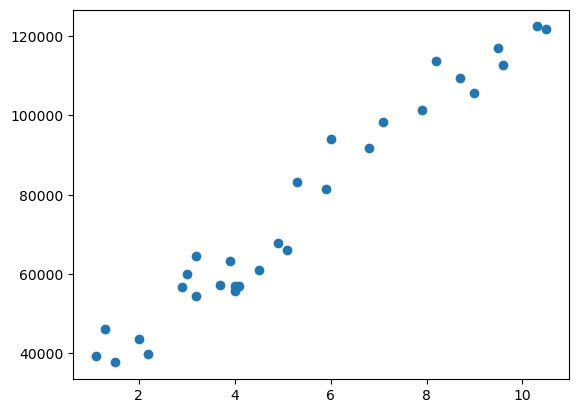

In [60]:
plt.scatter(df["YearsExperience"], df["Salary"])
plt.plot(X_train, y_pred, color="orange")
plt.xlabel("Years of Experince")
plt.ylabel("Salaries")

In [22]:
#Second Method - Vectorized MSE (all samples)

y_pred = m * X_train + b
cost = np.mean(y_train - y_pred)**2
print(cost)

nan


In [48]:
c = [3,4,5,5,6,6]

for i in range(len(c)):
    print(i)

0
1
2
3
4
5
